In [79]:
import pandas as pd
import numpy as np

# load training data
X = pd.read_csv('X_train.csv')
Y = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')

# show availible features
X.columns

Index(['GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'HEIGHT', 'WEIGHT'],
      dtype='object')

In [80]:
# preprocessing features
X['PTS_AVG'] = X['PTS'] / X['GP']
X['AST_AVG'] = X['AST'] / X['GP']
X['STL_AVG'] = X['STL'] / X['GP']
X['BLK_AVG'] = X['BLK'] / X['GP']
X['TOV_AVG'] = X['TOV'] / X['GP']
X['REB_AVG'] = X['REB'] / X['GP']
X['HEIGHT'] = X['HEIGHT'].map(lambda height: 12*int(height.split('-')[0]) + int(height.split('-')[1]))


# preprocessing features
X_test['PTS_AVG'] = X_test['PTS'] / X_test['GP']
X_test['AST_AVG'] = X_test['AST'] / X_test['GP']
X_test['STL_AVG'] = X_test['STL'] / X_test['GP']
X_test['BLK_AVG'] = X_test['BLK'] / X_test['GP']
X_test['TOV_AVG'] = X_test['TOV'] / X_test['GP']
X_test['REB_AVG'] = X_test['REB'] / X_test['GP']
X_test['HEIGHT'] = X_test['HEIGHT'].map(lambda height: 12*int(height.split('-')[0]) + int(height.split('-')[1]))

In [81]:
from keras.utils import to_categorical

# select features
s = ['MIN', 'FG_PCT', 'FG3A', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'HEIGHT', 'WEIGHT', 'PTS_AVG', 'AST_AVG', 'STL_AVG',
                     'BLK_AVG', 'TOV_AVG', 'REB_AVG', 'HEIGHT', 'HEIGHT']
selected_features = ['HEIGHT', 'REB', 'WEIGHT', 'FG_PCT']
X = X[selected_features].values.copy()
Y = Y['POSITION'].values.copy()
X_test = X_test[selected_features].values.copy()

# data normalization
for i in range(X.shape[1]):
    X[:,i] -= np.mean(X[:,i])
    X[:,i] /= np.std(X[:,i])
    X_test[:,i] -= np.mean(X_test[:,i])
    X_test[:,i] /= np.std(X_test[:,i])

# split data into training set and validation set
X_val = X[9000:]
Y_val = Y[9000:]
X_train = X[:9000]
Y_train = Y[:9000]

# one-hot encoding
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)

In [82]:
# build a linear model 
import keras
from keras.models import Sequential
from keras.layers import Dense

# logistic regression:0.75
model = Sequential()
# model.add(Dense(5, input_dim = len(selected_features), activation = 'softmax'))

# overfitting model
# model.add(Dense(400, input_dim = len(selected_features), activation = 'relu'))
# model.add(Dense(200, activation = 'relu'))
# model.add(Dense(100, activation = 'relu'))
# model.add(Dense(5, activation = 'softmax'))

# overfitting model + regularizer
reg = keras.regularizers.l2(0.01)
model.add(Dense(400, input_dim = len(selected_features), activation = 'relu', kernel_regularizer = reg))
model.add(Dense(200, activation = 'relu', kernel_regularizer = reg))
model.add(Dense(100, activation = 'relu', kernel_regularizer = reg))
model.add(Dense(5, activation = 'softmax', kernel_regularizer = reg))

# compile model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ['acc'])

# training
history = model.fit(X_train, Y_train, epochs=300, batch_size=128, validation_data=(X_val,Y_val))


Train on 9000 samples, validate on 3000 samples
Epoch 1/300
9000/9000 [==============================] - 1s 129us/step - loss: 3.0662 - acc: 0.6491 - val_loss: 1.5781 - val_acc: 0.7357
Epoch 2/300
9000/9000 [==============================] - 0s 27us/step - loss: 1.2006 - acc: 0.7227 - val_loss: 0.9979 - val_acc: 0.7520
Epoch 3/300
9000/9000 [==============================] - 0s 27us/step - loss: 0.9390 - acc: 0.7257 - val_loss: 0.9090 - val_acc: 0.7493
Epoch 4/300
9000/9000 [==============================] - 0s 27us/step - loss: 0.8863 - acc: 0.7280 - val_loss: 0.8762 - val_acc: 0.7423
Epoch 5/300
9000/9000 [==============================] - 0s 27us/step - loss: 0.8749 - acc: 0.7218 - val_loss: 0.8781 - val_acc: 0.7217
Epoch 6/300
9000/9000 [==============================] - 0s 31us/step - loss: 0.8562 - acc: 0.7231 - val_loss: 0.8485 - val_acc: 0.7530
Epoch 7/300
9000/9000 [==============================] - 0s 28us/step - loss: 0.8477 - acc: 0.7239 - val_loss: 0.8339 - val_acc: 0.7550

9000/9000 [==============================] - 0s 26us/step - loss: 0.8021 - acc: 0.7257 - val_loss: 0.8031 - val_acc: 0.7443
Epoch 61/300
9000/9000 [==============================] - 0s 27us/step - loss: 0.7965 - acc: 0.7268 - val_loss: 0.7884 - val_acc: 0.7520
Epoch 62/300
9000/9000 [==============================] - 0s 25us/step - loss: 0.7983 - acc: 0.7271 - val_loss: 0.7918 - val_acc: 0.7463
Epoch 63/300
9000/9000 [==============================] - 0s 25us/step - loss: 0.7994 - acc: 0.7251 - val_loss: 0.7932 - val_acc: 0.7577
Epoch 64/300
9000/9000 [==============================] - 0s 27us/step - loss: 0.7969 - acc: 0.7252 - val_loss: 0.7906 - val_acc: 0.7530
Epoch 65/300
9000/9000 [==============================] - 0s 25us/step - loss: 0.7965 - acc: 0.7262 - val_loss: 0.7952 - val_acc: 0.7583
Epoch 66/300
9000/9000 [==============================] - 0s 25us/step - loss: 0.8031 - acc: 0.7212 - val_loss: 0.7918 - val_acc: 0.7463
Epoch 67/300
9000/9000 [==============================

Epoch 120/300
9000/9000 [==============================] - 0s 29us/step - loss: 0.7894 - acc: 0.7276 - val_loss: 0.7922 - val_acc: 0.7523
Epoch 121/300
9000/9000 [==============================] - 0s 36us/step - loss: 0.7899 - acc: 0.7266 - val_loss: 0.7986 - val_acc: 0.7307
Epoch 122/300
9000/9000 [==============================] - 0s 29us/step - loss: 0.7909 - acc: 0.7251 - val_loss: 0.7852 - val_acc: 0.7553
Epoch 123/300
9000/9000 [==============================] - 0s 30us/step - loss: 0.7917 - acc: 0.7268 - val_loss: 0.7904 - val_acc: 0.7543
Epoch 124/300
9000/9000 [==============================] - 0s 30us/step - loss: 0.7909 - acc: 0.7244 - val_loss: 0.7880 - val_acc: 0.7550
Epoch 125/300
9000/9000 [==============================] - 0s 28us/step - loss: 0.7927 - acc: 0.7252 - val_loss: 0.7869 - val_acc: 0.7473
Epoch 126/300
9000/9000 [==============================] - 0s 29us/step - loss: 0.7902 - acc: 0.7276 - val_loss: 0.7833 - val_acc: 0.7547
Epoch 127/300
9000/9000 [=========

9000/9000 [==============================] - 0s 28us/step - loss: 0.7882 - acc: 0.7276 - val_loss: 0.7804 - val_acc: 0.7603
Epoch 180/300
9000/9000 [==============================] - 0s 26us/step - loss: 0.7872 - acc: 0.7264 - val_loss: 0.7944 - val_acc: 0.7273
Epoch 181/300
9000/9000 [==============================] - 0s 29us/step - loss: 0.7902 - acc: 0.7263 - val_loss: 0.7845 - val_acc: 0.7530
Epoch 182/300
9000/9000 [==============================] - 0s 39us/step - loss: 0.7919 - acc: 0.7206 - val_loss: 0.7946 - val_acc: 0.7357
Epoch 183/300
9000/9000 [==============================] - 0s 32us/step - loss: 0.7866 - acc: 0.7264 - val_loss: 0.7794 - val_acc: 0.7533
Epoch 184/300
9000/9000 [==============================] - 0s 25us/step - loss: 0.7848 - acc: 0.7264 - val_loss: 0.7803 - val_acc: 0.7550
Epoch 185/300
9000/9000 [==============================] - 0s 30us/step - loss: 0.7869 - acc: 0.7263 - val_loss: 0.7833 - val_acc: 0.7590
Epoch 186/300
9000/9000 [=======================

9000/9000 [==============================] - 0s 26us/step - loss: 0.7846 - acc: 0.7272 - val_loss: 0.7876 - val_acc: 0.7507
Epoch 239/300
9000/9000 [==============================] - 0s 25us/step - loss: 0.7869 - acc: 0.7272 - val_loss: 0.7790 - val_acc: 0.7553
Epoch 240/300
9000/9000 [==============================] - 0s 26us/step - loss: 0.7854 - acc: 0.7262 - val_loss: 0.7782 - val_acc: 0.7583
Epoch 241/300
9000/9000 [==============================] - 0s 27us/step - loss: 0.7867 - acc: 0.7239 - val_loss: 0.7812 - val_acc: 0.7533
Epoch 242/300
9000/9000 [==============================] - 0s 26us/step - loss: 0.7866 - acc: 0.7269 - val_loss: 0.7791 - val_acc: 0.7600
Epoch 243/300
9000/9000 [==============================] - 0s 25us/step - loss: 0.7851 - acc: 0.7260 - val_loss: 0.7865 - val_acc: 0.7493
Epoch 244/300
9000/9000 [==============================] - 0s 25us/step - loss: 0.7862 - acc: 0.7250 - val_loss: 0.7856 - val_acc: 0.7487
Epoch 245/300
9000/9000 [=======================

9000/9000 [==============================] - 0s 25us/step - loss: 0.7867 - acc: 0.7253 - val_loss: 0.7851 - val_acc: 0.7380
Epoch 298/300
9000/9000 [==============================] - 0s 29us/step - loss: 0.7853 - acc: 0.7248 - val_loss: 0.7832 - val_acc: 0.7573
Epoch 299/300
9000/9000 [==============================] - 0s 27us/step - loss: 0.7853 - acc: 0.7269 - val_loss: 0.7796 - val_acc: 0.7547
Epoch 300/300
9000/9000 [==============================] - 0s 29us/step - loss: 0.7841 - acc: 0.7247 - val_loss: 0.7813 - val_acc: 0.7623


In [83]:
# predict
predicted = np.argmax(model.predict(X_test), axis = 1)
out_file = 'out.csv'
with open(out_file,'w') as f:
    f.write('id,label\n')
    for i in range(len(predicted)):
        f.write(str(i)+','+str(predicted[i])+'\n')

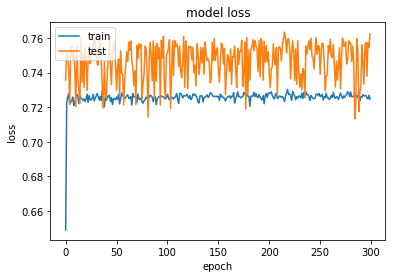

In [84]:
# training process

from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('history_regularization')
plt.show()